

# Численная модель
Реализовать численную модель уравнений ошибок одноканальной БИНС, посмотреть как она работает для разных ошибок акселерометров, ДУС, ошибок начальных условий. Сопоставьте с тем, что было на лекции.


# Фильтр Калмана

Фильтр Калмана можно начинать моделировать на этой же системе. В качестве замеров можно взять ошибку положения, либо ошибку скорости, либо то и другое одновременно. Отладка фильтра примерно такая: задаются постоянные инструментальные ошибки, повороты по углу D и настройками фильтра добиваются приемлемой сходимости оценок ошибок. Более предметно об этом можно говорить когда появится модель.   

# Фильтр Калмана (Линейные системы)
Задача коррекции БИНС ставится как задача
оценивания вектора состояния $х$ линейной динамической системы по измерениям $z$.


Модель системы (процесса):
$$\dot x = A \cdot x + q,$$

Модель наблюдений (измерений):
$$z = H \cdot x + \omega,$$


q, w – векторные случайные процессы типа белого шума с
нулевым средним значением и заданными матрицами интенсивностей.

Метод Эйлера для численного дифференцирования:
$$x_{k} = Ax_{k-1} + q_{k}\\$$
$$   z_{k} = Hx_{k} + \omega_{k}$$

Требуется получить оценку вектора состояния системы $\hat{x}_k$, зная аналогичную оценку на предыдущем шаге ($\hat{x}_{k-1}$) и  вектор измерений $z_k$.

## Прогноз

Прогноз (экстраполяция) вектора состояния с помощью модели процесса:
$$\overline{x}_k = A_k \cdot \hat{x}_{k-1}$$

Прогноз матрицы ковариации ошибок:
$$\overline{P}_k = A_k\cdot \hat{P}_{k-1}\cdot A_k^T + Q_k$$


## Коррекция

Вычисление коэффициента усиления Калмана:
$$K_k = \overline{P}_k \cdot H_{k}^T \cdot \left(H_k\cdot \overline{P}_k\cdot H_k^T + R_k\right)^{-1}$$

Оценка матрицы ковариации ошибки:
$$\hat{P}_k = \left(E - K_k\cdot H_k\right)\cdot \overline{P}_k$$

Оценка вектора состояния:
$$\hat{x}_k = \overline{x}_k + K_k\cdot\left(z_k - H_k\cdot\overline{x}_k\right)$$

## Решение системы


Точное решение системы ДУ второго порядка имеет вид
\begin{equation}
   x = C_{1} e^t \begin{pmatrix} x_{base1} \\ x_{base2} \end{pmatrix} + C_{2} e^{-t} \begin{pmatrix} x_{base3} \\ x_{base3} \end{pmatrix} +  C_{3}  \begin{pmatrix} x_{special1} \\ x_{special2} \end{pmatrix}
\end{equation}

## Уравнение ошибок одноканальной БИНС

В терминах трёхгранников p (материлизованнный осями чувсвительности) и x (опорный):
$$ \Delta x = \begin{pmatrix} \Delta \lambda \\ \Delta \upsilon_{y_2} \\ \alpha \end{pmatrix}$$

$$\downarrow$$

$$ \Delta \dot x = \begin{pmatrix} \Delta \dot  \lambda \\ \Delta \dot  \upsilon_{y_2} \\ \dot  \alpha \end{pmatrix}$$,

где 

$\Delta \lambda$ - ошибка измерения долготы, 


$\Delta \upsilon_{y_2} $ - ошибка измерения скорости вдоль $y_2$ (близко к $x_2$ из-за малости угла $\gamma$), 


$\Delta \alpha$ - динамическая ошибка вертикали.



$$ A = \begin{pmatrix} 0 \quad \frac{1}{a} \quad 0 \\ 0 \quad 0 \quad -g \\ 0 \quad \frac{1}{a} \quad 0 \end{pmatrix}$$



$$ q = \begin{pmatrix} 0  \\ \Delta f_{p_2} \cos D - \Delta f_{p_1} \sin D \\ -\nu_{p_3} \end{pmatrix}$$

$$\downarrow$$


$$ \begin{pmatrix} \Delta \dot  \lambda \\ \Delta \dot  \upsilon_{y_2} \\ \dot  \alpha \end{pmatrix} = \begin{pmatrix} 0 \quad \frac{1}{a} \quad 0 \\ 0 \quad 0 \quad -g \\ 0 \quad \frac{1}{a} \quad 0 \end{pmatrix} \begin{pmatrix} \Delta \lambda \\ \Delta \upsilon_{y_2} \\ \alpha \end{pmatrix} + \begin{pmatrix} 0  \\ \Delta f_{p_2} \cos D - \Delta f_{p_1} \sin D \\ -\nu_{p_3} \end{pmatrix}$$,

$$\downarrow$$


$$ \begin{pmatrix} \Delta \dot  \lambda \\ \Delta \dot  \upsilon_{y_2} \\ \dot  \alpha \end{pmatrix} = \begin{pmatrix} 0 \quad \frac{1}{a} \quad 0 \\ 0 \quad 0 \quad -g \\ 0 \quad \frac{1}{a} \quad 0 \end{pmatrix} \begin{pmatrix} \Delta \lambda \\ \Delta \upsilon_{y_2} \\ \alpha \end{pmatrix} - \begin{pmatrix} 0  \\0 \\ \nu_{p_3} \end{pmatrix} +   \begin{pmatrix} 0  \\ \Delta f_{p_2} \cos D \\ 0 \end{pmatrix} - \begin{pmatrix} 0  \\ \Delta f_{p_1} \sin D \\ 0 \end{pmatrix}$$,


Суперпозиция - каждый вощмущающий фактор можно исслеовать независимо от других, то есть рассматривать парциальные вклады каждой из ошибок. 


## Уравнение ошибок одноканальной БИНС
### Смещение нуля акселерометра $\Delta f_z = 10^{-3} \frac{m}{c^2}$
$$ \begin{pmatrix} \Delta \dot  \lambda \\ \Delta \dot  \upsilon_{y_2} \\ \dot  \alpha \end{pmatrix} = \begin{pmatrix} 0 \quad \frac{1}{a} \quad 0 \\ 0 \quad 0 \quad -g \\ 0 \quad \frac{1}{a} \quad 0 \end{pmatrix} \begin{pmatrix} \Delta \lambda \\ \Delta \upsilon_{y_2} \\ \alpha \end{pmatrix} - \begin{pmatrix} 0  \\ \Delta f_z \\ 0 \end{pmatrix}$$
### Начальная ошибка вертикали $\alpha = 20''$
$$ \begin{pmatrix} \Delta \dot  \lambda \\ \Delta \dot  \upsilon_{y_2} \\ \dot  \alpha \end{pmatrix} = \begin{pmatrix} 0 \quad \frac{1}{a} \quad 0 \\ 0 \quad 0 \quad -g \\ 0 \quad \frac{1}{a} \quad 0 \end{pmatrix} \begin{pmatrix} \Delta \lambda \\ \Delta \upsilon_{y_2} \\ \alpha \end{pmatrix} - \begin{pmatrix} 0  \\ \Delta f_z \\ 0 \end{pmatrix}$$
### Ошибка дрейфа $\nu_{z_3} = 0.001 \frac{\circ}{hour}$
$$ \begin{pmatrix} \Delta \dot  \lambda \\ \Delta \dot  \upsilon_{y_2} \\ \dot  \alpha \end{pmatrix} = \begin{pmatrix} 0 \quad \frac{1}{a} \quad 0 \\ 0 \quad 0 \quad -g \\ 0 \quad \frac{1}{a} \quad 0 \end{pmatrix} \begin{pmatrix} \Delta \lambda \\ \Delta \upsilon_{y_2} \\ \alpha \end{pmatrix} - \begin{pmatrix} 0  \\ 0 \\ \nu_{z_3} \end{pmatrix}$$
### Ошибка скорости $\upsilon_{y_2}  = 1 \frac{m}{c^2}$
$$ \begin{pmatrix} \Delta \dot  \lambda \\ \Delta \dot  \upsilon_{y_2} \\ \dot  \alpha \end{pmatrix} = \begin{pmatrix} 0 \quad \frac{1}{a} \quad 0 \\ 0 \quad 0 \quad -g \\ 0 \quad \frac{1}{a} \quad 0 \end{pmatrix} \begin{pmatrix} \Delta \lambda \\ \Delta \upsilon_{y_2} \\ \alpha \end{pmatrix} - \begin{pmatrix} 0  \\ 0 \\ \nu_{z_3} \end{pmatrix}$$


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Инициализация
tau = 0.01
T = 3 
a = 6378136
A = np.array([[0, 1/a, 0],[0, 0, -9.81], [0, 1/a, 0]])
print('Матрица динамики системы')
print(f'A = {A}\n')


H = np.array([0, 0, 1]).T
print('Матрица измерения системы')
print(f'H = {H}\n')

Q = np.array([[1, 0, 0],[0, 1, 0], [0, 0, 1]])
print('Матрица ковариации ошибок модели')
print(f'Q = {Q}\n')


R = 1
print('Матрица ковариации ошибок измерений')
print(f'R = {R}\n')

I = np.eye(3)
P = I
print('Матрица ковариации ошибок оценки состояния')
print(f'P = {P}\n')

x = np.array([1, 1, 1])
x_estimate = x
l = int(T / tau)
z = x[0]
print('Вектор состояния модели')
print(f'x = {x}\n')

print('Вектор оценки состояния модели')
print(f'x_estimate = {x_estimate}\n')

print('Вектор измерения')
print(f'z = {z}\n')

q = np.random.normal(0, 1, l)
print('Шум модели')
print(f'q = {q}\n')

w = tau*np.array([np.random.normal(0, 3**0.5, l), np.random.normal(0, 3**0.5, l), np.random.normal(0, 3**0.5, l)])
print('Шум измерений')
print(f'w = {w}\n')


x_plot1 = np.zeros((l, 3))
x_plot2 = np.zeros((l, 3))
#print(f'x_plot2 = {x_plot2}\n')
z_plot = np.zeros(l)
#print(f'z_plot = {z_plot}\n')


Матрица динамики системы
A = [[ 0.00000000e+00  1.56785619e-07  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -9.81000000e+00]
 [ 0.00000000e+00  1.56785619e-07  0.00000000e+00]]

Матрица измерения системы
H = [0 0 1]

Матрица ковариации ошибок модели
Q = [[1 0 0]
 [0 1 0]
 [0 0 1]]

Матрица ковариации ошибок измерений
R = 1

Матрица ковариации ошибок оценки состояния
P = [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Вектор состояния модели
x = [1 1 1]

Вектор оценки состояния модели
x_estimate = [1 1 1]

Вектор измерения
z = 1

Шум модели
q = [-0.36792439  1.94205925 -1.55161816  0.90856802  0.95010771  0.09217409
  1.9486045  -1.82522308  0.08360824  1.10408008 -0.7112989  -0.94972686
  0.51569238 -1.15763573 -0.77801296 -0.86921992 -1.09947745  1.4045593
 -0.95274766  2.03869704 -0.78335864  0.97702895  0.30147464  0.12470781
  0.42456521  0.7840591  -0.87647036 -0.10971973 -0.07959295 -0.12888581
 -1.22548328  0.38179554 -0.13665789 -1.16754222 -2.84236855 -0.10998549
  0.92318501 -0.0

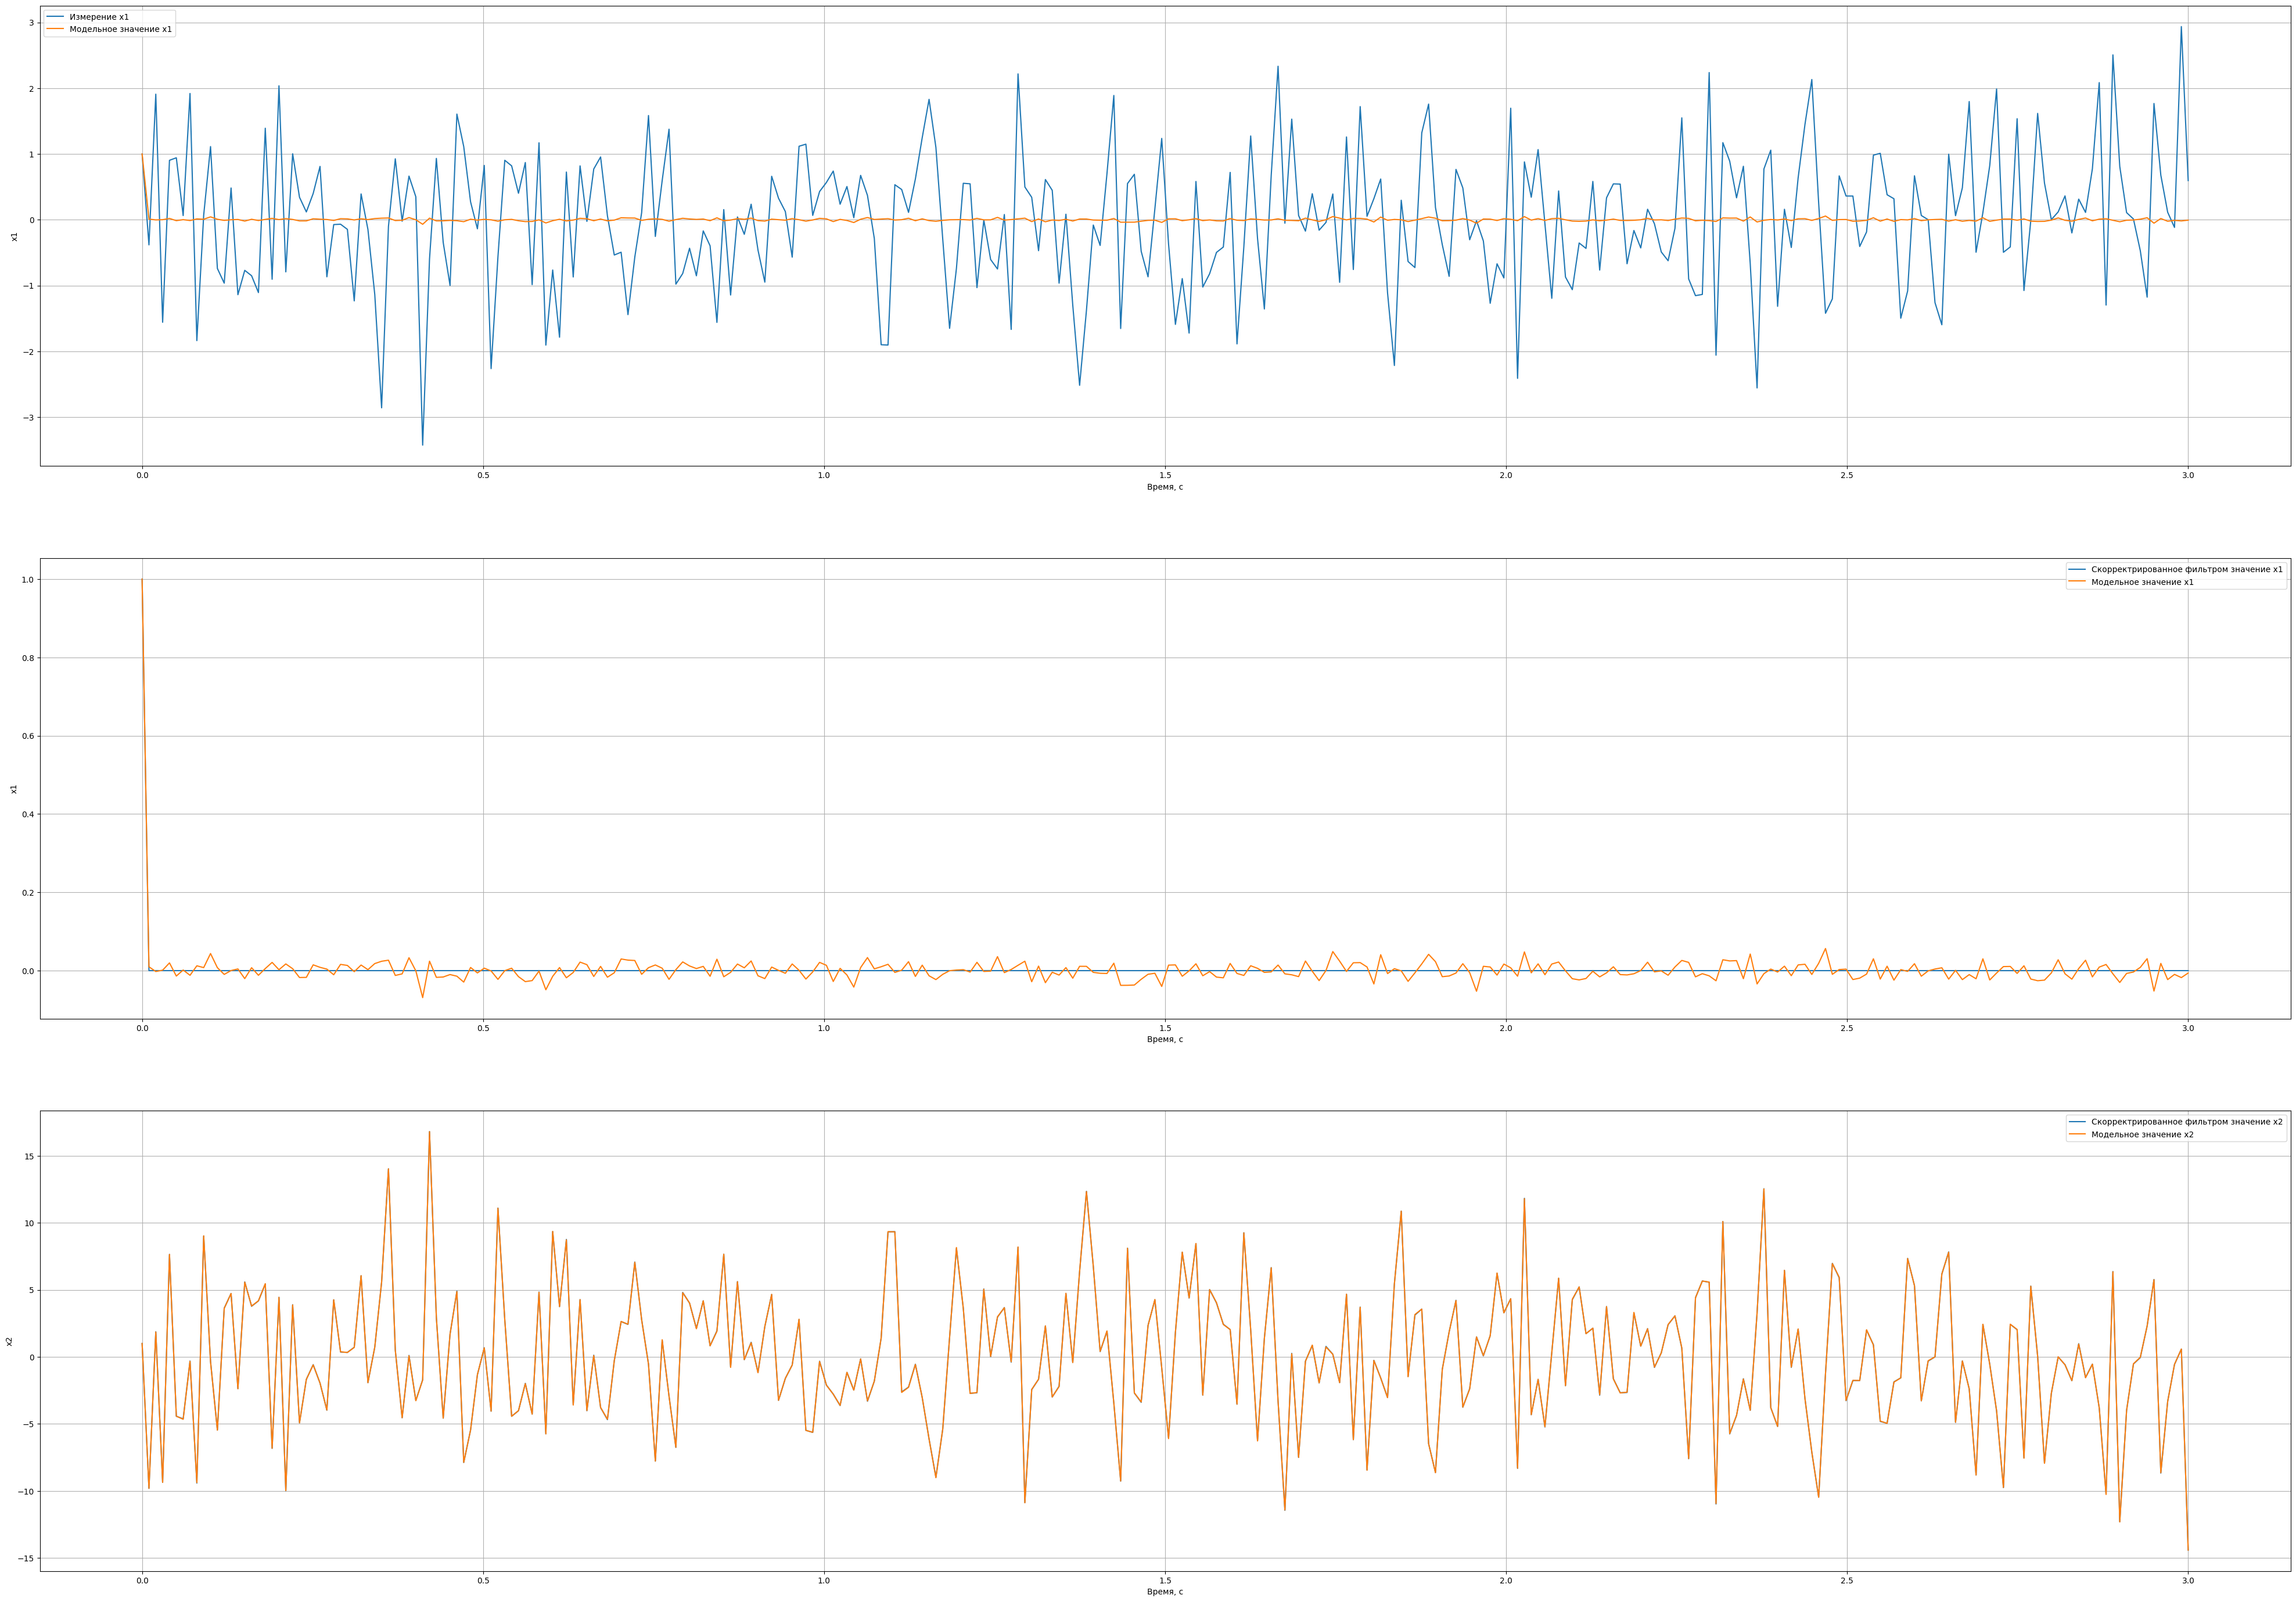

In [32]:
def Kalman_algo(A_human, H_human, x_est, w_human, q_human, P_human, Q_human, R_human, I_human, x_pred, P_pred, K_calc, z_measure):
        x_predict = np.dot(A_human, x_est)
        P_predict = np.dot(A_human, np.dot(P_human, A_human.T)) + Q
    
        K_calc = np.dot(P_pred, H_human.T) / (np.dot(H_human, np.dot(P_pred, H_human.T)) + R_human)
        x_est = x_pred + np.dot(K_calc, z_measure - np.dot(H_human, x_pred))
        P_human = np.dot(I_human - np.dot(K_calc, H_human), P_pred)

for i in range(l):
    x_plot1[i, :] = x_estimate
    x_plot2[i, :] = x
    z_plot[i] = z

    x = np.dot(A, x_estimate) + w[:, i]
    z = np.dot(H, x) + q[i]
    
    
    x_predict = np.dot(A, x_estimate)
    P_predict = np.dot(A, np.dot(P, A.T)) + Q
    
    K = np.dot(P_predict, H.T) / (np.dot(H, np.dot(P_predict, H.T)) + R)
    x_estimate = x_predict + np.dot(K, z - np.dot(H, x_predict))
    P = np.dot(I - np.dot(K, H), P_predict)
    
    #Kalman_algo(A, H, x_estimate, w, q, P, Q, R, I, x_predict, P_predict, K, z)
    
t = np.linspace(0, T, l)
fig = plt.figure(figsize=(50, 35))

ax = fig.add_subplot(3, 1, 1)
ax.plot(t, z_plot, label='Измерение x1')
ax.plot(t, x_plot2[:, 0], label='Модельное значение x1')
ax.grid()
ax.legend()
ax.set_xlabel('Время, с')
ax.set_ylabel('x1')

ax = fig.add_subplot(3, 1, 2)
ax.plot(t, x_plot1[:, 0], label='Скорректрированное фильтром значение x1')
ax.plot(t, x_plot2[:, 0], label='Модельное значение x1')
ax.set_xlabel('Время, с')
ax.set_ylabel('x1')
ax.grid()
ax.legend()

ax = fig.add_subplot(3, 1, 3)
ax.plot(t, x_plot1[:, 1], label='Скорректрированное фильтром значение x2')
ax.plot(t, x_plot2[:, 1], label='Модельное значение x2')
ax.set_xlabel('Время, с')
ax.set_ylabel('x2')
ax.grid()
ax.legend()

plt.show()

## Уравнение ошибок одноканальной БИНС
### Смещение нуля акселерометра $\Delta f_z = 10^{-3} \frac{m}{c^2}$
$$ \begin{pmatrix} \Delta \dot  r \\ \Delta \dot  \upsilon_{y_2} \\ \dot  \alpha \end{pmatrix} = \begin{pmatrix} 0 \quad \frac{1}{a} \quad 0 \\ 0 \quad 0 \quad -g \\ 0 \quad \frac{1}{a} \quad 0 \end{pmatrix} \begin{pmatrix} \Delta r \\ \Delta \upsilon_{y_2} \\ \alpha \end{pmatrix} - \begin{pmatrix} 0  \\ \Delta f_z \\ 0 \end{pmatrix}$$,

$$\Delta r = a \Delta \lambda$$

$$\dot x = A \cdot x + q,$$
$$z = H \cdot x + \omega$$

$$\downarrow$$
$$x_k = A_{k-1}x_{k-1} + q_{k-1},$$
$$z_k = H_{k}x_{k} +  \omega_{k},$$
$$x_k = (E + \Delta t A(t_{initial}))x_{initial}$$

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Инициализация
tau = 0.01
T = 3 
a = 6378136
A = np.array([[0, 1/a, 0],[0, 0, -9.81], [0, 1/a, 0]])
print('Матрица динамики системы')
print(f'A = {A}\n')


H = np.array([1, 0, 0])
print('Матрица измерения системы')
print(f'H = {H}\n')

Q = np.array([[0, 0, 0],[0, 0.001, 0], [0, 0, 0.001]])
print('Матрица ковариации ошибок модели')
print(f'Q = {Q}\n')


R = 0.0001
print('Матрица ковариации ошибок измерений')
print(f'R = {R}\n')

I = np.eye(3)
P = I
print('Матрица ковариации ошибок оценки состояния')
print(f'P = {P}\n')

x = np.array([0, 0, 0])
x_estimate = x
l = int(T / tau)
z = x[0]
print('Вектор состояния модели')
print(f'x = {x}\n')

print('Вектор оценки состояния модели')
print(f'x_estimate = {x_estimate}\n')

print('Вектор измерения')
print(f'z = {z}\n')

w = np.random.normal(0, 1, l)
print('Шум модели')
print(f'w = {w}\n')

q = tau*np.array([np.random.normal(0, 3**0.5, l), np.random.normal(0, 3**0.5, l), np.random.normal(0, 3**0.5, l)])
print('Смещение нуля акселлерометра')
print(f'q = {q}\n')


x_plot1 = np.zeros((l, 3))
x_plot2 = np.zeros((l, 3))
#print(f'x_plot2 = {x_plot2}\n')
z_plot = np.zeros(l)
#print(f'z_plot = {z_plot}\n')


Матрица динамики системы
A = [[ 0.00000000e+00  1.56785619e-07  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -9.81000000e+00]
 [ 0.00000000e+00  1.56785619e-07  0.00000000e+00]]

Матрица измерения системы
H = [1 0 0]

Матрица ковариации ошибок модели
Q = [[0.    0.    0.   ]
 [0.    0.001 0.   ]
 [0.    0.    0.001]]

Матрица ковариации ошибок измерений
R = 0.0001

Матрица ковариации ошибок оценки состояния
P = [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Вектор состояния модели
x = [0 0 0]

Вектор оценки состояния модели
x_estimate = [0 0 0]

Вектор измерения
z = 0

Шум модели
w = [-5.67811570e-01  3.26242587e-01 -1.05525171e+00  3.21593874e-01
 -1.55974548e+00 -3.18105854e-01  3.43681107e-01  6.64096064e-01
  1.61805132e+00 -1.37131819e+00 -1.22071253e+00  1.96319769e+00
 -1.09108039e+00 -4.08491981e-01 -2.18959227e-01 -3.66616013e-01
  4.22061596e-01 -2.20102700e-01 -1.03739365e-01  1.24999311e+00
  9.37520193e-01 -5.98498383e-01  2.42635498e+00 -9.42877072e-01
 -5.23175664e-01  5.765

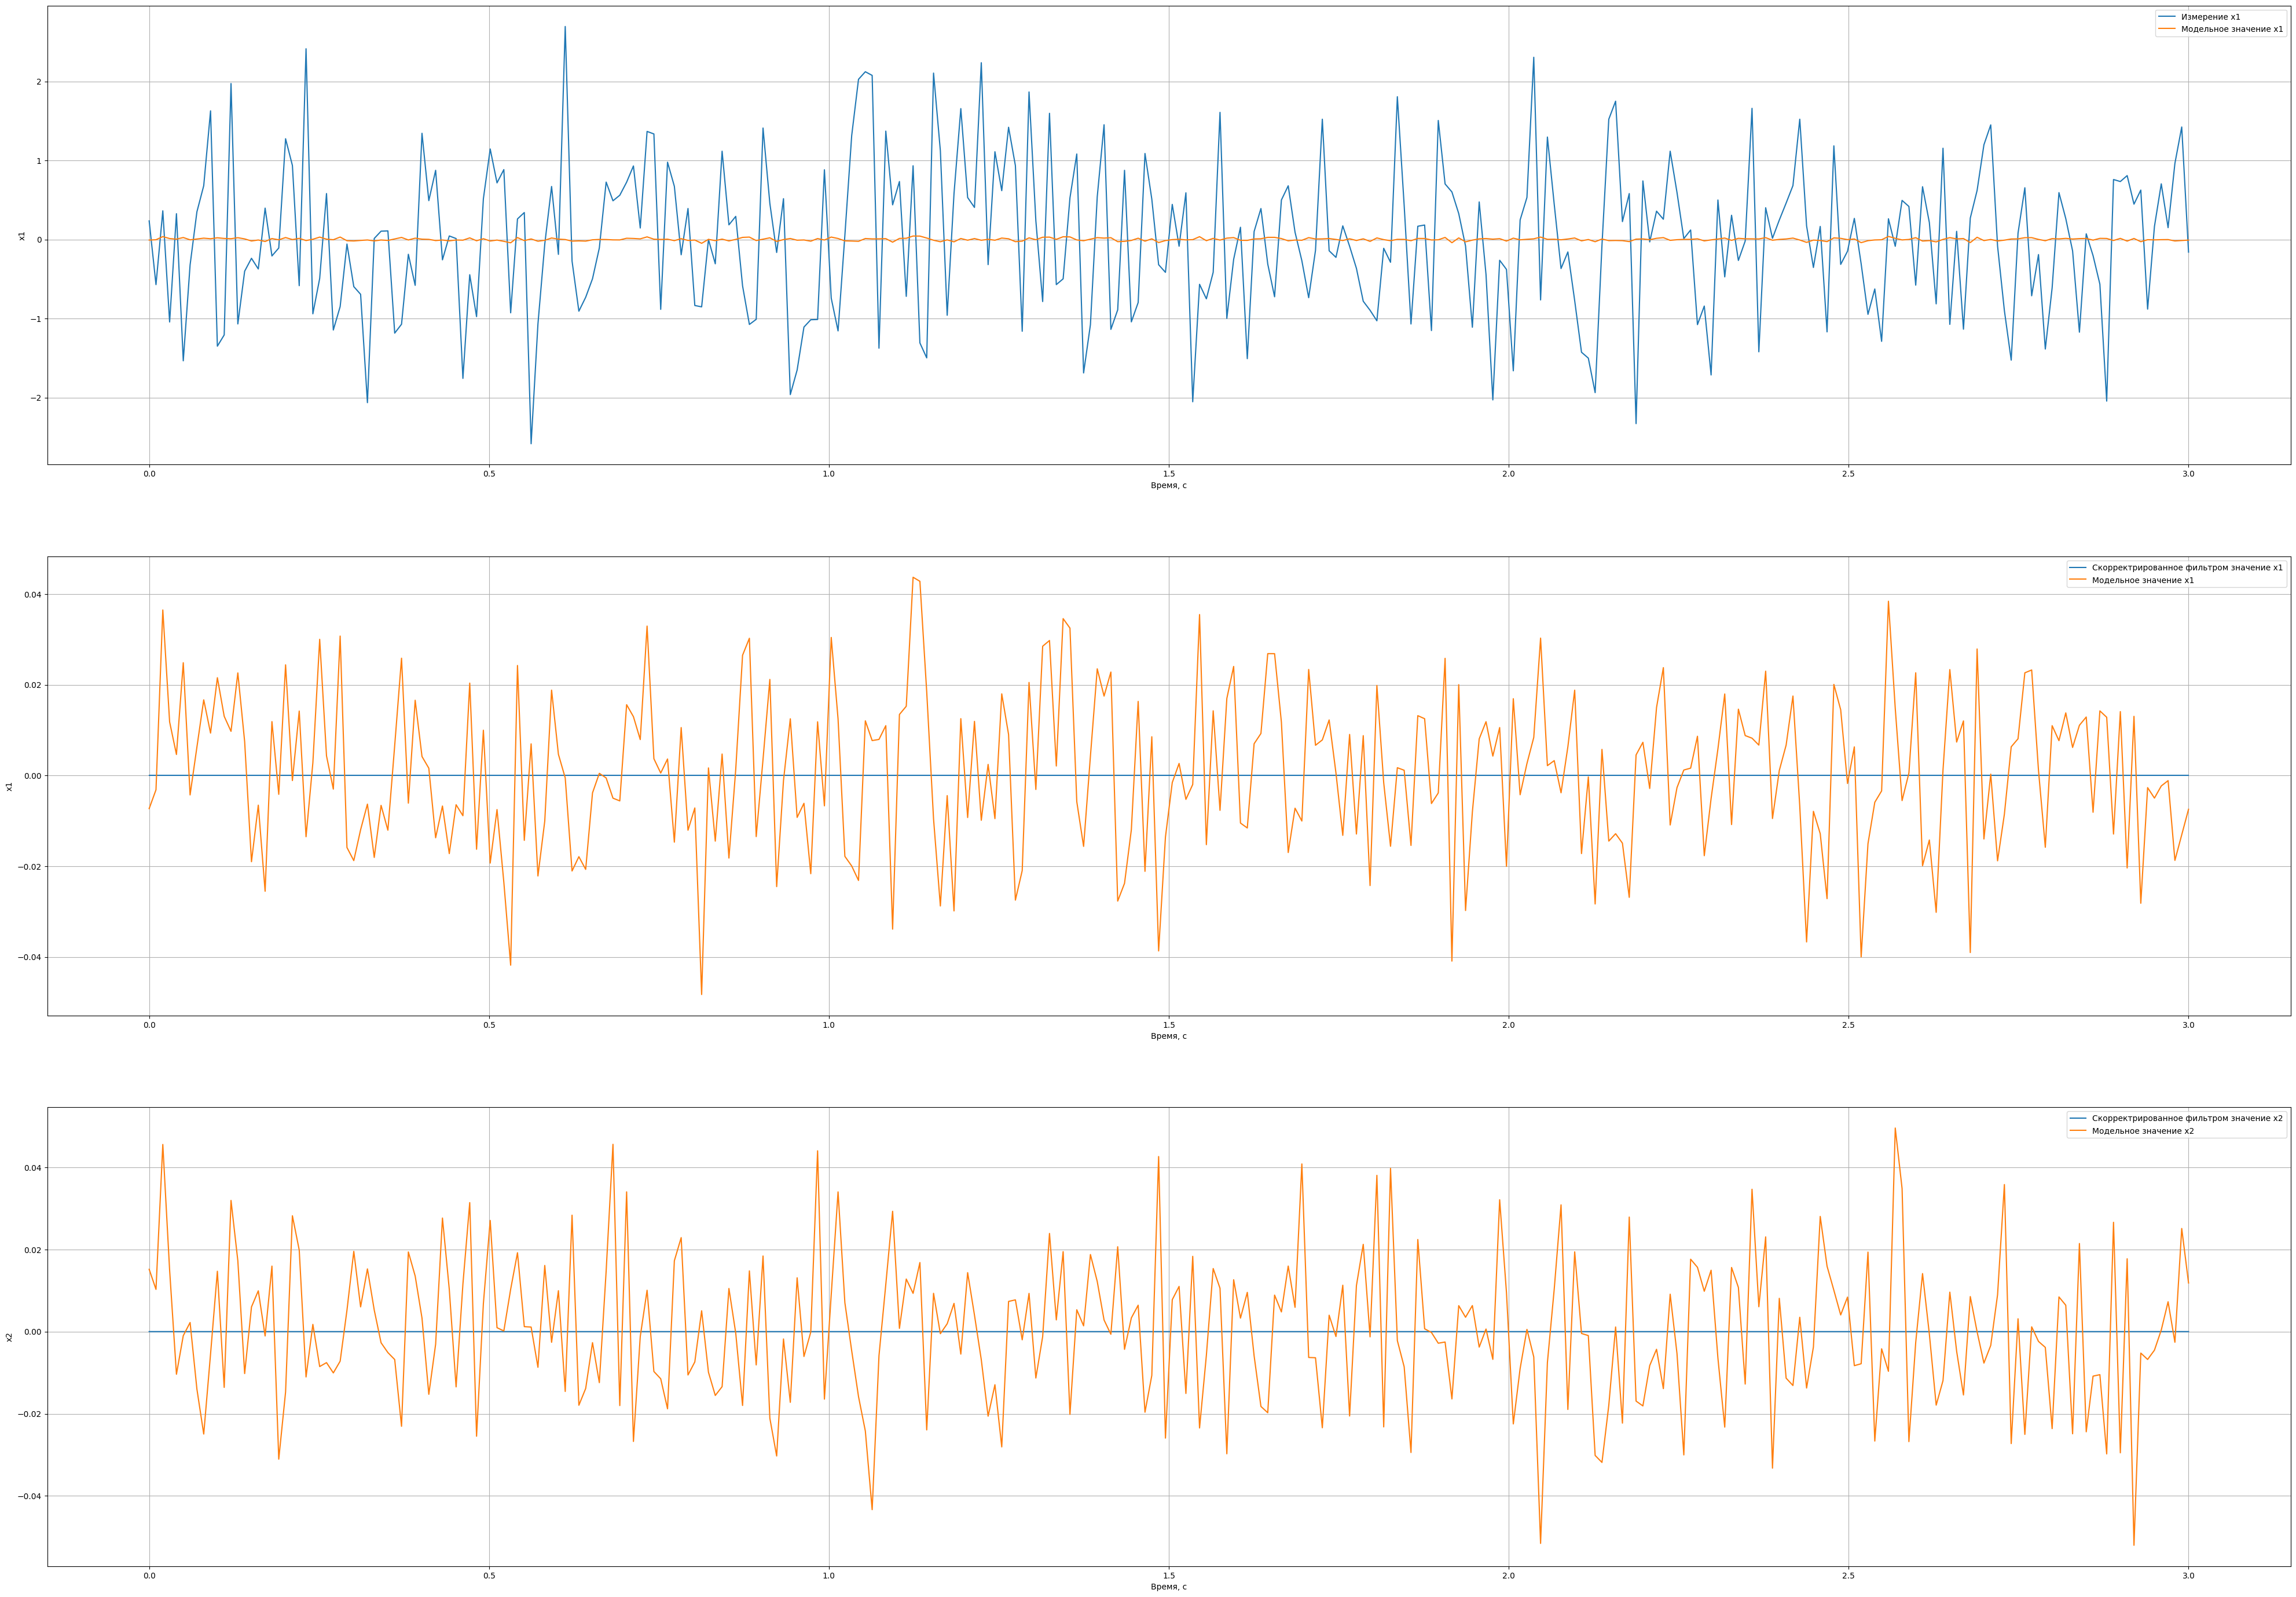

In [22]:
for i in range(l):
    x_plot1[i, :] = x_estimate
    x_plot2[i, :] = x
    z_plot[i] = z

    x = np.dot(A, x_estimate) + q[:, i]
    z = np.dot(H, x) + w[i]
    
     
    x_predict = np.dot(A, x_estimate)
    P_predict = np.dot(A, np.dot(P, A.T)) + Q
    
    K = np.dot(P_predict, H.T) / (np.dot(H, np.dot(P_predict, H.T)) + R)
    x_estimate = x_predict + np.dot(K, z - np.dot(H, x_predict))
    P = np.dot(I - np.dot(K, H), P_predict)
    
    
    #Kalman_algo(A, H, x_estimate, w, q, P, Q, R, I, x_predict, P_predict, K, z)
    
t = np.linspace(0, T, l)
fig = plt.figure(figsize=(50, 35))

ax = fig.add_subplot(3, 1, 1)
ax.plot(t, z_plot, label='Измерение x1')
ax.plot(t, x_plot2[:, 0], label='Модельное значение x1')
ax.grid()
ax.legend()
ax.set_xlabel('Время, с')
ax.set_ylabel('x1')

ax = fig.add_subplot(3, 1, 2)
ax.plot(t, x_plot1[:, 0], label='Скорректрированное фильтром значение x1')
ax.plot(t, x_plot2[:, 0], label='Модельное значение x1')
ax.set_xlabel('Время, с')
ax.set_ylabel('x1')
ax.grid()
ax.legend()

ax = fig.add_subplot(3, 1, 3)
ax.plot(t, x_plot1[:, 1], label='Скорректрированное фильтром значение x2')
ax.plot(t, x_plot2[:, 1], label='Модельное значение x2')
ax.set_xlabel('Время, с')
ax.set_ylabel('x2')
ax.grid()
ax.legend()

plt.show()

In [26]:
import plotly.express as px
import plotly.graph_objs as go

fig_app = go.Figure()
fig_app.add_trace(go.Scatter(x=t, y=x_plot2[:, 0], name='$Модель$'))
fig_app.add_trace(go.Scatter(x=t, y=z_plot, name='$Измерение$'))
fig_app.update_layout(legend_orientation="v",
                      legend=dict(x=0.9, xanchor="right", y=0.9, yanchor='top',
                        font=dict(size=13)),
                      title=f'$График$',
                      xaxis_title='$Время, отсчеты$',
                      yaxis_title="$Величина$",
                      margin=dict(l=0, r=0, t=30, b=0))
fig_app.show()
fig_app.savefig(f'/png/std1.png', dpi=150)

AttributeError: 'Figure' object has no attribute 'savefig'